# Data Importantion and Formatting
The data was formatted in text files delimited by spaces. I used regular expressions to extract the data from each of the files. 

In [0]:
import numpy as np
import pandas as pd
import re

In [47]:
df = pd.read_table('issuance_loans.txt')


col = df.columns.values[0]
df['raw'] = df[col]
##try splitting with regex
iss_loans = df['raw'].str.extract(r'(\d\d\d)  (.{7})  (.{12}) (.{10}) (...) (.{13}) (.{10}) (...) (.{9}) (..) (.{7}) (..) (.) (...)  (.{7}) (...) (...)  (.{12}) (.{9}) (.{5}) (.+)$')
iss_loans.columns = ['bor_credit_score', 'curr_int_rate', 'curr_upb', 'first_pay_date', 'first_time_hb_flag', 'loan_channel','loan_id','loan_product_type','loan_purpose','loan_state','maturity_date','numb_of_borr','numb_of_units','orig_dti','orig_int_rate','orig_loan_term', 'orig_ltv', 'orig_upb', 'property_occupancy','property_type','servicer_name']
iss_loans.replace('NULL',np.nan, inplace = True)
iss_loans['curr_int_rate'] = iss_loans['curr_int_rate'].astype(float)
iss_loans['orig_int_rate'] = iss_loans['orig_int_rate'].astype(float)
iss_loans['first_pay_date'] = pd.to_datetime(iss_loans['first_pay_date'])
iss_loans['first_time_hb_flag'].replace('NO', 0, inplace = True)
iss_loans['first_time_hb_flag'].replace('YES', 1, inplace = True)
iss_loans['numb_of_borr'] = iss_loans['numb_of_borr'].astype(float)
iss_loans['numb_of_units'] = iss_loans['numb_of_units'].astype(float)
iss_loans['curr_upb'] = iss_loans['curr_upb'].astype(float)
iss_loans['orig_upb'] = iss_loans['orig_upb'].astype(float)  
problem = iss_loans['orig_dti'][9] #dealing with a missing value 
iss_loans.replace(problem,np.nan, inplace = True)
iss_loans['orig_dti'] = iss_loans['orig_dti'].astype(float)
iss_loans['orig_loan_term'] = iss_loans['orig_loan_term'].astype(float)
iss_loans['orig_ltv'] = iss_loans['orig_ltv'].astype(float)

iss_loans.head()


,bor_credit_score,curr_int_rate,curr_upb,first_pay_date,first_time_hb_flag,loan_channel,loan_id,loan_product_type,loan_purpose,loan_state,...,numb_of_borr,numb_of_units,orig_dti,orig_int_rate,orig_loan_term,orig_ltv,orig_upb,property_occupancy,property_type,servicer_name
0,767,4.125,268000.00,2016-03-01,NO,RETAIL,5988487888,FRM,PURCHASE,FL,...,2.0,1.0,30.0,4.125,360.0,80.0,268000.0,PRINCIPAL,PUD,FIRSTBANK PUERTO RICO
1,703,3.000,54000.00,2016-02-01,NO,RETAIL,5988487906,FRM,REFINANCE,PR,...,2.0,1.0,35.0,3.000,120.0,60.0,54000.0,PRINCIPAL,SF,ORIENTAL BANK
2,708,3.750,127142.51,2016-01-01,NO,RETAIL,5988487907,FRM,REFINANCE,PR,...,2.0,2.0,44.0,3.750,240.0,85.0,127500.0,PRINCIPAL,SF,ORIENTAL BANK
3,789,4.125,179400.00,2016-02-01,NO,RETAIL,5988487908,FRM,REFINANCE,PR,...,1.0,1.0,58.0,4.125,360.0,111.0,179400.0,PRINCIPAL,CONDO,ORIENTAL BANK
4,738,4.125,93700.00,2016-02-01,NO,RETAIL,5988487909,FRM,REFINANCE,PR,...,1.0,1.0,41.0,4.125,360.0,106.0,93700.0,PRINCIPAL,CONDO,ORIENTAL BANK


In [48]:
df = pd.read_table('loans_origination_info.txt')


col = df.columns.values[0]
df['raw'] = df[col]

##try splitting with regex
loans_orig_info = df['raw'].str.extract('(.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+) (.+)')
loans_orig_info.columns = df.columns.values[0].split(' ')
loans_orig_info = loans_orig_info.replace('NULL', np.nan)
loans_orig_info['nb_loan_number'] = loans_orig_info['nb_loan_number'].astype(float)
loans_orig_info['nb_original_balance'] = loans_orig_info['nb_original_balance'].astype(float)
loans_orig_info['nb_original_fico'] = loans_orig_info['nb_original_fico'].astype(float)
loans_orig_info['nb_debt_ratio'] = loans_orig_info['nb_debt_ratio'].astype(float)
loans_orig_info['nb_original_rate'] = loans_orig_info['nb_original_rate'].astype(float)
loans_orig_info['nb_original_ltv'] = loans_orig_info['nb_original_ltv'].astype(float)
loans_orig_info['nb_original_cltv'] = loans_orig_info['nb_original_cltv'].astype(float)
loans_orig_info['nb_unit_count'] = loans_orig_info['nb_unit_count'].astype(float)
loans_orig_info['nb_original_term'] = loans_orig_info['nb_original_term'].astype(float)
loans_orig_info['nb_io_term'] = loans_orig_info['nb_io_term'].astype(float)
loans_orig_info['nb_origination_date'] = pd.to_datetime(loans_orig_info['nb_origination_date'])
loans_orig_info['nb_maturity_date'] = pd.to_datetime(loans_orig_info['nb_maturity_date'])

loans_orig_info.head()

,nb_loan_number,nb_original_balance,nb_original_fico,nb_debt_ratio,nb_original_rate,nb_original_ltv,nb_original_cltv,nb_unit_count,nb_original_term,nb_io_term,nb_origination_date,nb_maturity_date,nb_purpose_code,nb_occupancy_code,nb_documentation_type_code,nb_property_type_code,nb_property_zip_code
0,2.0,254700.0,613.0,NaN,NaN,90.00,0.0,1.0,360.0,60.0,2004-06-30,2034-07-01,RefiWithCash,Owner,AllDocs,SingleFamily,95829
1,3.0,209000.0,632.0,NaN,NaN,88.94,0.0,1.0,360.0,NaN,2004-07-30,2034-08-01,RefiWithCash,NotOwner,LimitedDocs,Condo,90805
2,4.0,160000.0,590.0,NaN,NaN,42.67,0.0,1.0,360.0,60.0,2004-08-23,2034-09-01,RefiWithCash,Owner,AllDocs,SingleFamily,90041
3,5.0,130000.0,502.0,NaN,NaN,66.67,0.0,1.0,360.0,NaN,2004-08-17,2034-09-01,Refi,Owner,AllDocs,PUD,85541
4,6.0,255000.0,611.0,NaN,NaN,60.00,0.0,1.0,360.0,NaN,2004-10-18,2034-11-01,RefiWithCash,Owner,AllDocs,SingleFamily,90620


In [49]:
df = pd.read_table('loans_performance_timeseries.txt')


col = df.columns.values[0]
df['raw'] = df[col]

##try splitting with regex
loans_perf = df['raw'].str.extract('(.+) (.+) (.+) (.+) (.+) (.+)')
loans_perf.columns = df.columns.values[0].split(' ')
loans_perf = loans_perf.replace('NULL', np.nan)
loans_perf['nb_factor_date'] = pd.to_datetime(loans_perf['nb_factor_date'])
loans_perf['nb_loan_number'] = loans_perf['nb_loan_number'].astype(float)
loans_perf['nb_current_balance'] = loans_perf['nb_current_balance'].astype(float)
loans_perf['nb_realized_loss'] = loans_perf['nb_realized_loss'].astype(float)
loans_perf['nb_age'] = loans_perf['nb_age'].astype(float)
loans_perf['nb_delinquent_days'] = loans_perf['nb_delinquent_days'].astype(float)
loans_perf = loans_perf[pd.notnull(loans_perf['nb_delinquent_days'])].reset_index(drop = True) #drop meaningless rows and reindex
loans_perf.sort_values('nb_factor_date')
most_recent = loans_perf['nb_factor_date'].max()
in_progress = loans_perf[loans_perf['nb_factor_date'] >= most_recent ]
in_progress

,nb_loan_number,nb_factor_date,nb_current_balance,nb_realized_loss,nb_age,nb_delinquent_days
331,12.0,2019-04-01,222619.11,59546.55,172.0,0.0
778,25.0,2019-04-01,133429.12,0.00,171.0,0.0
1251,47.0,2019-04-01,163099.00,0.00,171.0,0.0
2235,92.0,2019-04-01,148999.08,0.00,171.0,0.0
2500,99.0,2019-04-01,191107.01,33000.00,171.0,0.0
3091,118.0,2019-04-01,100233.96,191133.50,172.0,0.0
3426,129.0,2019-04-01,49359.49,0.00,171.0,0.0
3676,134.0,2019-04-01,28593.04,23306.98,173.0,0.0
4457,154.0,2019-04-01,89797.73,0.00,173.0,0.0
4617,157.0,2019-04-01,98970.08,43561.93,171.0,0.0


In [53]:
#determine which nb_loan_number's ended with losses
loan_losses = loans_perf[loans_perf['nb_realized_loss'] > 0]
loan_losses = loan_losses[['nb_loan_number', 'nb_realized_loss']].groupby(['nb_loan_number'], as_index = False).sum()
loan_losses['caused_loss'] = 1
loan_losses = loans_perf[['nb_loan_number', 'nb_age']].groupby(['nb_loan_number']).max().merge(loan_losses, how = 'right', on = 'nb_loan_number')
loan_losses

,nb_loan_number,nb_age,nb_realized_loss,caused_loss
0,12.0,172.0,4049165.40,1
1,99.0,171.0,2277000.00,1
2,118.0,172.0,12614811.00,1
3,134.0,173.0,1118735.04,1
4,157.0,171.0,1393981.76,1
5,171.0,117.0,87288.00,1
6,265.0,174.0,1892579.80,1
7,322.0,173.0,1824700.00,1
8,336.0,171.0,2229038.40,1
9,357.0,171.0,2225204.94,1


In [54]:
loans_info = loans_orig_info[['nb_loan_number']]
loans_info = loans_info.merge(loan_losses, how = 'left')
loans_info['nb_realized_loss'] = loans_info['nb_realized_loss'].fillna(0)
loans_info['caused_loss'] = loans_info['caused_loss'].fillna(0)
loans_info['age'] = loans_perf['nb_age']
loans_info['orig_term'] = loans_orig_info['nb_original_term']
loans_info['orig_balance'] = loans_orig_info['nb_original_balance']
loans_info['orig_fico'] = loans_orig_info['nb_original_fico']
loans_info['orig_ltv'] = loans_orig_info['nb_original_ltv']
loans_info = loans_info.drop(columns={'nb_age'})
#loans_info['debt_ratio'] = loans_orig_info['nb_debt_ratio']
loans_info.head(10)

,nb_loan_number,nb_realized_loss,caused_loss,age,orig_term,orig_balance,orig_fico,orig_ltv
0,2.0,0.0,0.0,7.0,360.0,254700.0,613.0,90.00
1,3.0,0.0,0.0,8.0,360.0,209000.0,632.0,88.94
2,4.0,0.0,0.0,6.0,360.0,160000.0,590.0,42.67
3,5.0,0.0,0.0,7.0,360.0,130000.0,502.0,66.67
4,6.0,0.0,0.0,8.0,360.0,255000.0,611.0,60.00
5,7.0,0.0,0.0,9.0,360.0,185000.0,582.0,48.05
6,8.0,0.0,0.0,10.0,360.0,143100.0,781.0,90.00
7,9.0,0.0,0.0,11.0,360.0,197600.0,702.0,80.00
8,10.0,0.0,0.0,12.0,360.0,240100.0,614.0,70.00
9,11.0,0.0,0.0,13.0,360.0,182000.0,607.0,65.00


In [0]:
loans_info.sort_values('age').head()

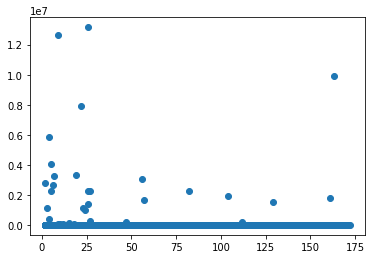

In [55]:
import matplotlib.pyplot as plt
x = loans_info['age']
y = loans_info['nb_realized_loss']
plt.scatter(x,y)
plt.show()

In [0]:
!pip install -q sklearn

In [0]:
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [57]:
loans_info['orig_fico'] = loans_orig_info['nb_original_fico']
loans_info['nb_realized_loss'] = np.log(loans_info['nb_realized_loss'])
loans_info['orig_balance'] = np.log(loans_info['orig_balance'])
vals = 0
runs = 100
x1 = 0
x2 = 0
x3 = 0
x4 = 0
for x in range (0,runs):
  clf = DecisionTreeClassifier()
  data = loans_info.dropna(axis = 0, how = 'any')
  X = (data.drop(columns={'nb_loan_number','nb_realized_loss', 'caused_loss','age'}))
  X_train, X_test, Y_train, Y_test = train_test_split(X, data['caused_loss'], test_size = .7, train_size = .3)
  tree = clf.fit(X_train, Y_train)
  vals = vals + (tree.score(X_test, Y_test))
  #print(tree.feature_importances_)
  x1 += tree.feature_importances_[0]
  x2 += tree.feature_importances_[1]
  x3 += tree.feature_importances_[2]
  x4 += tree.feature_importances_[3]
print(vals/runs) 
print('Average Importance of Loan Term, Loam Amount, FICO Score, and Loan to Value Ratio')
print(x1/runs)
print(x2/runs)
print(x3/runs)
x4/runs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0.9323121387283237
Average Importance of Loan Term, Loam Amount, FICO Score, and Loan to Value Ratio
0.010556063610468798
0.5150554232067018
0.2723396397175099


0.20204887346531955